# Chalearn Data Analysis - Visualization

In [4]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from extract_feat_stage4 import createXY
import numpy as np

## 1)  Import Training Data
* Features extracted using a 3D RexNeXt-101 model, pretrained on the Kitenics dataset
* Features are provided as a 2048 dimensional vectors for each 16 frame segment of a video. These were concatenated and the mean value was kept, producing a single 2048 dimensional vector for one entire video
* Classification is performed for the 'extraversion' label since it has the most datasamples after binarizing at values > 0.5 with 55% of the data samples being positive examples (the rest of the labels has at best 43% positive examples) accross the entire dataset of 6000 videos. 
* Keeping the student dataset in mind, the dataset was reduced to 960 videos. After reducing the dataset, the percentage of positive examples was 53.5%

In [6]:
#import features (X) and labels (Y)
print('loading...')
X, Y = createXY()
print('X-dim = ', X.ndim)
print('Y-dim = ', Y.ndim)
print(len(X))
print(len(Y))

loading...
X-dim =  2
Y-dim =  1
960
960


## 2) Plot feature map as image

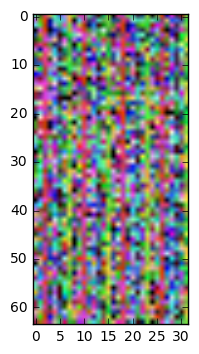

In [39]:
from PIL import Image

import matplotlib.pyplot as plt

%matplotlib inline

X_0 = X_0.reshape((64,32))
img = Image.fromarray(X_0, 'RGB')
imgplot = plt.imshow(img)


## 3) 2D Plot

In [37]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X) # Fit X into an embedded space and return that transformed output
X_embedded.shape


(960, 2)

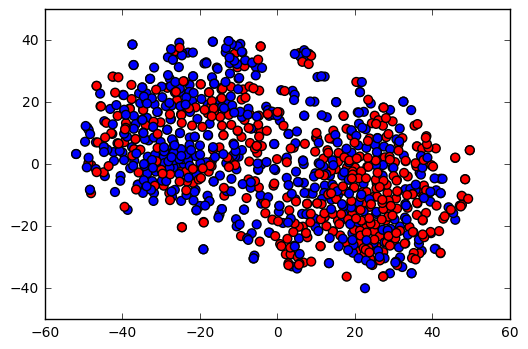

In [63]:
color= ['red' if l == 0 else 'blue' for l in Y]
plt.scatter(X_embedded[:,0], X_embedded[:,1], color=color,marker='o',edgecolors='k',s=40)

## 4) 3D Plot

In [66]:
X_embedded3d = TSNE(n_components=3).fit_transform(X) # Fit X into an embedded space and return that transformed output
X_embedded3d.shape


(960, 3)

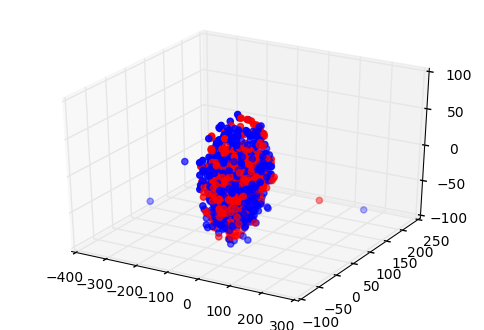

In [68]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_embedded3d[:,0],X_embedded3d[:,1],X_embedded3d[:,2] \
           , color=color, marker='o',s=20)

